@Author Chinmay

## Neural Network in Keras

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df = pd.read_csv('OUTPUT_WBI_exposer_cyclones_v10.csv')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1005 non-null   int64  
 1   SID                                                  1005 non-null   object 
 2   NAME                                                 1005 non-null   object 
 3   ISO                                                  1005 non-null   object 
 4   YEAR                                                 1005 non-null   int64  
 5   BASIN                                                1005 non-null   object 
 6   SUB BASIN                                            1005 non-null   object 
 7   NATURE                                               1005 non-null   object 
 8   ISO_TIME                                             1005 non-null  

In [132]:
cols_to_be_dropped = ['Unnamed: 0', 'SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'DAY_HRS', 'NIGHT_HRS', 'in_wbi',
                 '34KN_POP', '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS']           

##### Took the following from Dev's notebook

In [133]:
df2 = df.drop(cols_to_be_dropped, axis=1)

# Adding month per Vamsi's code in SVM folder
df2['Month'] = df2.ISO_TIME.apply(lambda x: x[7:9]).astype(int)

# Using Xavier's CPI logic...
df2["TOTAL_DAMAGE_(000$)_Adjusted"]= df2["TOTAL_DAMAGE_(000$)"] / df2["CPI"]
df2["TOTAL_DAMAGE_(000$)_Adjusted"]= df2["TOTAL_DAMAGE_(000$)_Adjusted"].replace(0, np.nan)
df2 = df2.drop(["TOTAL_DAMAGE_(000$)",'CPI'], axis=1)

# df["TOTAL_DAMAGE_(000$)_Adjusted"].isna().sum()

In [137]:
df2.describe()

,TOTAL_HRS,USA_SSHS,WIND_CALC_MEAN,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),...,Rural population (% of total population),TOTAL_AFFECTED,pop_max_34,pop_max_50,pop_max_64,pop_max_34_adj,pop_max_50_adj,pop_max_64_adj,Month,TOTAL_DAMAGE_(000$)_Adjusted
count,1005.000000,1005.000000,1001.000000,1005.000000,1005.000000,1005.000000,1005.000000,871.000000,846.000000,1004.000000,...,1005.000000,1.005000e+03,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,1005.000000,6.860000e+02
mean,13.187065,0.379104,59.718462,975.450806,12.047601,215.481903,90.011543,285.650976,4376.537201,0.187221,...,47.065884,5.768923e+05,3.087827e+07,1.682272e+07,6.612771e+06,2.881670e+07,1.572880e+07,6.236887e+06,7.780100,1.720795e+04
std,7.412493,1.747668,25.080155,56.845274,6.586180,96.090666,31.633313,4736.886681,8546.885540,0.352292,...,22.016753,1.991082e+06,4.585703e+07,2.915235e+07,1.216466e+07,4.467633e+07,2.844234e+07,1.195170e+07,2.762945,8.934955e+04
min,0.000000,-5.000000,18.620690,0.000000,1.565217,2.000000,30.000000,1.000000,0.000000,0.000425,...,0.000000,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.188367e-01
25%,6.000000,-1.000000,40.000000,966.400000,7.666667,153.800000,62.400000,6.000000,107.421149,0.058654,...,23.959000,3.000000e+03,3.548714e+06,1.303948e+06,2.978861e+05,3.102442e+06,1.115492e+06,2.871373e+05,7.000000,2.644725e+02
50%,15.000000,0.000000,55.250000,981.857143,10.666667,260.750000,89.200000,17.000000,452.302860,0.090486,...,53.525000,3.000000e+04,1.298315e+07,5.110083e+06,1.808295e+06,1.115819e+07,4.504274e+06,1.615052e+06,8.000000,1.296263e+03
75%,21.000000,1.000000,75.705882,993.571429,14.411765,288.250000,114.700000,58.500000,4232.312000,0.191018,...,64.917000,2.480580e+05,3.959444e+07,1.888719e+07,6.611138e+06,3.472225e+07,1.776724e+07,6.091829e+06,10.000000,6.420699e+03
max,23.000000,5.000000,150.000000,1013.000000,49.800000,358.000000,171.800000,138366.000000,42985.295220,3.069373,...,92.421000,2.962200e+07,3.764972e+08,3.204817e+08,1.073239e+08,3.764972e+08,3.222762e+08,1.073686e+08,12.000000,1.636382e+06


In [144]:
numeric_var = []
cat_var = []
for col in df2.columns:
    if df2.dtypes[col] == 'object':
        cat_var.append(col)
    else:
        numeric_var.append(col)

print("\nNumeric columns:\n ", numeric_var)
print("\n\nCategorical columns:\n ", cat_var)


Numeric columns:
  ['TOTAL_HRS', 'USA_SSHS', 'WIND_CALC_MEAN', 'PRES_CALC_MEAN', 'STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', 'TOTAL_DEATHS', 'Air transport, freight (million ton-km)', 'Arable land (hectares per person)', 'Cereal yield (kg per hectare)', 'Food production index (2004-2006 = 100)', 'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$', 'Life expectancy at birth, total (years)', 'Mobile cellular subscriptions (per 100 people)', 'Population density (people per sq. km of land area)', 'Adjusted savings: education expenditure (% of GNI)', 'Rural population (% of total population)', 'TOTAL_AFFECTED', 'pop_max_34', 'pop_max_50', 'pop_max_64', 'pop_max_34_adj', 'pop_max_50_adj', 'pop_max_64_adj', 'Month', 'TOTAL_DAMAGE_(000$)_Adjusted']


Categorical columns:
  ['BASIN', 'SUB BASIN', 'NATURE', 'ISO_TIME', 'Income_level_Final']


#### Dealing with missing values

In [139]:
#Filling missing values as the nearest value before it for categorical features
df2[cat_var].fillna( method ='ffill', inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   BASIN                                                1005 non-null   object 
 1   SUB BASIN                                            1005 non-null   object 
 2   NATURE                                               1005 non-null   object 
 3   ISO_TIME                                             1005 non-null   object 
 4   TOTAL_HRS                                            1005 non-null   int64  
 5   USA_SSHS                                             1005 non-null   int64  
 6   WIND_CALC_MEAN                                       1001 non-null   float64
 7   PRES_CALC_MEAN                                       1005 non-null   float64
 8   STORM_SPD_MEAN                                       1005 non-null  

C:\Users\ckris\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [140]:
#Filling median for numeric data

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df2[numeric_var])
df2[numeric_var] = imputer.transform(df2[numeric_var])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   BASIN                                                1005 non-null   object 
 1   SUB BASIN                                            1005 non-null   object 
 2   NATURE                                               1005 non-null   object 
 3   ISO_TIME                                             1005 non-null   object 
 4   TOTAL_HRS                                            1005 non-null   float64
 5   USA_SSHS                                             1005 non-null   float64
 6   WIND_CALC_MEAN                                       1005 non-null   float64
 7   PRES_CALC_MEAN                                       1005 non-null   float64
 8   STORM_SPD_MEAN                                       1005 non-null  

#### Preprocessing: Standard Scaling and Label Encoding

In [180]:
#Splitting into target and features
X = df2.drop('TOTAL_AFFECTED', axis=1)
y = df2['TOTAL_AFFECTED']
y

0         194046.0
1         642117.0
2          20200.0
3          60000.0
4            103.0
           ...    
1000        1100.0
1001     1501500.0
1002      345311.0
1003      400094.0
1004    20000000.0
Name: TOTAL_AFFECTED, Length: 1005, dtype: float64

In [181]:
#We do not need to standardise the target variable, hence we remove it.
numeric_var.remove('TOTAL_AFFECTED')
print(numeric_var)

ValueError: list.remove(x): x not in list

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()


for feature in cat_var:
    X[feature] = le.fit_transform(X[feature])

X[numeric_var] = scaler.fit_transform(X[numeric_var])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   BASIN                                                1005 non-null   int32  
 1   SUB BASIN                                            1005 non-null   int32  
 2   NATURE                                               1005 non-null   int32  
 3   ISO_TIME                                             1005 non-null   int32  
 4   TOTAL_HRS                                            1005 non-null   float64
 5   USA_SSHS                                             1005 non-null   float64
 6   WIND_CALC_MEAN                                       1005 non-null   float64
 7   PRES_CALC_MEAN                                       1005 non-null   float64
 8   STORM_SPD_MEAN                                       1005 non-null  

#### Building a model

Model made referring to [this tutorial](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33) on medium.

In [183]:
#Training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
from keras.models import Sequential
from keras.layers import Dense

In [185]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adadelta', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               8704      
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 49,921
Trainable params: 49,921
Non-trainable params: 0
_________________________________________________________________


In [186]:
history = NN_model.fit(X_train, y_train, epochs=1000, validation_split = 0.2)

Train on 643 samples, validate on 161 samples
Epoch 1/1000
643/643 [==============================] - 0s 270us/step - loss: 551642.8095 - mean_absolute_error: 551642.8125 - val_loss: 580356.4905 - val_mean_absolute_error: 580356.5000
Epoch 2/1000
643/643 [==============================] - 0s 119us/step - loss: 548183.0399 - mean_absolute_error: 548183.0625 - val_loss: 580632.5494 - val_mean_absolute_error: 580632.5625
Epoch 3/1000
643/643 [==============================] - 0s 112us/step - loss: 548320.6346 - mean_absolute_error: 548320.6250 - val_loss: 580309.3796 - val_mean_absolute_error: 580309.3125
Epoch 4/1000
643/643 [==============================] - 0s 121us/step - loss: 547177.5078 - mean_absolute_error: 547177.5000 - val_loss: 579582.3889 - val_mean_absolute_error: 579582.3750
Epoch 5/1000
643/643 [==============================] - 0s 116us/step - loss: 546839.5628 - mean_absolute_error: 546839.6250 - val_loss: 578706.8699 - val_mean_absolute_error: 578706.8125
Epoch 6/1000
6

643/643 [==============================] - 0s 93us/step - loss: 532359.4232 - mean_absolute_error: 532359.3750 - val_loss: 567683.7613 - val_mean_absolute_error: 567683.7500
Epoch 45/1000
643/643 [==============================] - 0s 95us/step - loss: 532533.5755 - mean_absolute_error: 532533.6250 - val_loss: 567956.2864 - val_mean_absolute_error: 567956.3125
Epoch 46/1000
643/643 [==============================] - 0s 92us/step - loss: 532336.3486 - mean_absolute_error: 532336.3750 - val_loss: 567542.9159 - val_mean_absolute_error: 567542.9375
Epoch 47/1000
643/643 [==============================] - 0s 95us/step - loss: 532032.7143 - mean_absolute_error: 532032.6250 - val_loss: 567655.6894 - val_mean_absolute_error: 567655.6875
Epoch 48/1000
643/643 [==============================] - 0s 95us/step - loss: 531987.3549 - mean_absolute_error: 531987.2500 - val_loss: 567072.6096 - val_mean_absolute_error: 567072.6250
Epoch 49/1000
643/643 [==============================] - 0s 95us/step - lo

643/643 [==============================] - 0s 119us/step - loss: 529420.3856 - mean_absolute_error: 529420.3750 - val_loss: 564103.0791 - val_mean_absolute_error: 564103.1250
Epoch 88/1000
643/643 [==============================] - 0s 118us/step - loss: 529538.3960 - mean_absolute_error: 529538.4375 - val_loss: 564926.6807 - val_mean_absolute_error: 564926.6875
Epoch 89/1000
643/643 [==============================] - 0s 95us/step - loss: 529673.8724 - mean_absolute_error: 529673.8750 - val_loss: 564216.2944 - val_mean_absolute_error: 564216.2500
Epoch 90/1000
643/643 [==============================] - 0s 93us/step - loss: 529547.5193 - mean_absolute_error: 529547.5000 - val_loss: 564687.2127 - val_mean_absolute_error: 564687.1875
Epoch 91/1000
643/643 [==============================] - 0s 93us/step - loss: 529419.8924 - mean_absolute_error: 529419.8750 - val_loss: 564329.5849 - val_mean_absolute_error: 564329.5625
Epoch 92/1000
643/643 [==============================] - 0s 93us/step - 

643/643 [==============================] - 0s 121us/step - loss: 527862.0809 - mean_absolute_error: 527862.0625 - val_loss: 563127.2371 - val_mean_absolute_error: 563127.1875
Epoch 131/1000
643/643 [==============================] - 0s 115us/step - loss: 527873.2045 - mean_absolute_error: 527873.1250 - val_loss: 563170.4343 - val_mean_absolute_error: 563170.3750
Epoch 132/1000
643/643 [==============================] - 0s 119us/step - loss: 527832.2812 - mean_absolute_error: 527832.3125 - val_loss: 562880.7074 - val_mean_absolute_error: 562880.7500
Epoch 133/1000
643/643 [==============================] - 0s 119us/step - loss: 527685.1387 - mean_absolute_error: 527685.1250 - val_loss: 562843.6850 - val_mean_absolute_error: 562843.6875
Epoch 134/1000
643/643 [==============================] - 0s 113us/step - loss: 527788.7929 - mean_absolute_error: 527788.7500 - val_loss: 563027.7144 - val_mean_absolute_error: 563027.7500
Epoch 135/1000
643/643 [==============================] - 0s 96us

643/643 [==============================] - 0s 94us/step - loss: 525955.5015 - mean_absolute_error: 525955.5625 - val_loss: 562373.1826 - val_mean_absolute_error: 562373.1875
Epoch 174/1000
643/643 [==============================] - 0s 93us/step - loss: 525423.0988 - mean_absolute_error: 525423.1250 - val_loss: 563968.7861 - val_mean_absolute_error: 563968.8750
Epoch 175/1000
643/643 [==============================] - 0s 95us/step - loss: 525991.4182 - mean_absolute_error: 525991.4375 - val_loss: 562258.3002 - val_mean_absolute_error: 562258.3125
Epoch 176/1000
643/643 [==============================] - 0s 96us/step - loss: 525510.1566 - mean_absolute_error: 525510.1875 - val_loss: 562544.1746 - val_mean_absolute_error: 562544.1875
Epoch 177/1000
643/643 [==============================] - 0s 92us/step - loss: 525397.0852 - mean_absolute_error: 525397.1250 - val_loss: 562347.0461 - val_mean_absolute_error: 562347.0000
Epoch 178/1000
643/643 [==============================] - 0s 102us/ste

643/643 [==============================] - 0s 99us/step - loss: 522884.3322 - mean_absolute_error: 522884.2812 - val_loss: 562279.4177 - val_mean_absolute_error: 562279.4375
Epoch 217/1000
643/643 [==============================] - 0s 99us/step - loss: 522982.2955 - mean_absolute_error: 522982.3125 - val_loss: 562588.2574 - val_mean_absolute_error: 562588.2500
Epoch 218/1000
643/643 [==============================] - 0s 101us/step - loss: 522932.0201 - mean_absolute_error: 522932.0625 - val_loss: 563033.6539 - val_mean_absolute_error: 563033.6875
Epoch 219/1000
643/643 [==============================] - 0s 98us/step - loss: 522857.5016 - mean_absolute_error: 522857.5625 - val_loss: 562617.8927 - val_mean_absolute_error: 562617.9375
Epoch 220/1000
643/643 [==============================] - 0s 99us/step - loss: 522546.2564 - mean_absolute_error: 522546.1562 - val_loss: 564384.4574 - val_mean_absolute_error: 564384.4375
Epoch 221/1000
643/643 [==============================] - 0s 104us/st

643/643 [==============================] - 0s 98us/step - loss: 520378.7612 - mean_absolute_error: 520378.7812 - val_loss: 562777.3016 - val_mean_absolute_error: 562777.3125
Epoch 260/1000
643/643 [==============================] - 0s 96us/step - loss: 519999.1442 - mean_absolute_error: 519999.0625 - val_loss: 564008.7575 - val_mean_absolute_error: 564008.7500
Epoch 261/1000
643/643 [==============================] - 0s 95us/step - loss: 520398.5573 - mean_absolute_error: 520398.4688 - val_loss: 565268.4289 - val_mean_absolute_error: 565268.4375
Epoch 262/1000
643/643 [==============================] - 0s 101us/step - loss: 520869.4110 - mean_absolute_error: 520869.4375 - val_loss: 563550.8194 - val_mean_absolute_error: 563550.8125
Epoch 263/1000
643/643 [==============================] - 0s 96us/step - loss: 520280.0412 - mean_absolute_error: 520280.0938 - val_loss: 563728.6570 - val_mean_absolute_error: 563728.6250
Epoch 264/1000
643/643 [==============================] - 0s 96us/ste

643/643 [==============================] - 0s 101us/step - loss: 517708.4614 - mean_absolute_error: 517708.5000 - val_loss: 562527.4136 - val_mean_absolute_error: 562527.4375
Epoch 303/1000
643/643 [==============================] - 0s 95us/step - loss: 516960.3240 - mean_absolute_error: 516960.3438 - val_loss: 562275.0945 - val_mean_absolute_error: 562275.0000
Epoch 304/1000
643/643 [==============================] - 0s 104us/step - loss: 517192.8150 - mean_absolute_error: 517192.8125 - val_loss: 562951.3481 - val_mean_absolute_error: 562951.3750
Epoch 305/1000
643/643 [==============================] - 0s 110us/step - loss: 517337.0021 - mean_absolute_error: 517336.9688 - val_loss: 562694.9926 - val_mean_absolute_error: 562695.0000
Epoch 306/1000
643/643 [==============================] - 0s 105us/step - loss: 517157.6654 - mean_absolute_error: 517157.6875 - val_loss: 562441.7206 - val_mean_absolute_error: 562441.7500
Epoch 307/1000
643/643 [==============================] - 0s 102us

643/643 [==============================] - 0s 115us/step - loss: 513252.7836 - mean_absolute_error: 513252.7812 - val_loss: 562662.1291 - val_mean_absolute_error: 562662.1250
Epoch 346/1000
643/643 [==============================] - 0s 104us/step - loss: 512726.7414 - mean_absolute_error: 512726.7500 - val_loss: 562877.3076 - val_mean_absolute_error: 562877.2500
Epoch 347/1000
643/643 [==============================] - 0s 105us/step - loss: 512348.8837 - mean_absolute_error: 512348.9062 - val_loss: 566548.3550 - val_mean_absolute_error: 566548.3125
Epoch 348/1000
643/643 [==============================] - 0s 105us/step - loss: 513025.1219 - mean_absolute_error: 513025.1562 - val_loss: 564923.7025 - val_mean_absolute_error: 564923.6875
Epoch 349/1000
643/643 [==============================] - 0s 105us/step - loss: 512613.3691 - mean_absolute_error: 512613.4375 - val_loss: 562834.9464 - val_mean_absolute_error: 562835.0000
Epoch 350/1000
643/643 [==============================] - 0s 98us

643/643 [==============================] - 0s 123us/step - loss: 507222.2948 - mean_absolute_error: 507222.3438 - val_loss: 571434.2267 - val_mean_absolute_error: 571434.2500
Epoch 389/1000
643/643 [==============================] - 0s 119us/step - loss: 506549.7328 - mean_absolute_error: 506549.6875 - val_loss: 569233.3521 - val_mean_absolute_error: 569233.3750
Epoch 390/1000
643/643 [==============================] - 0s 116us/step - loss: 506657.2520 - mean_absolute_error: 506657.2812 - val_loss: 571916.3059 - val_mean_absolute_error: 571916.3125
Epoch 391/1000
643/643 [==============================] - 0s 113us/step - loss: 505696.7473 - mean_absolute_error: 505696.6875 - val_loss: 569727.4536 - val_mean_absolute_error: 569727.5000
Epoch 392/1000
643/643 [==============================] - 0s 107us/step - loss: 505787.9477 - mean_absolute_error: 505787.9062 - val_loss: 570098.5005 - val_mean_absolute_error: 570098.5000
Epoch 393/1000
643/643 [==============================] - 0s 101u

643/643 [==============================] - 0s 138us/step - loss: 500517.5919 - mean_absolute_error: 500517.5625 - val_loss: 575832.9707 - val_mean_absolute_error: 575832.9375
Epoch 432/1000
643/643 [==============================] - 0s 127us/step - loss: 499901.8745 - mean_absolute_error: 499901.8750 - val_loss: 575712.6459 - val_mean_absolute_error: 575712.6250
Epoch 433/1000
643/643 [==============================] - 0s 115us/step - loss: 499260.7348 - mean_absolute_error: 499260.7500 - val_loss: 578711.4309 - val_mean_absolute_error: 578711.3750
Epoch 434/1000
643/643 [==============================] - 0s 118us/step - loss: 499131.4811 - mean_absolute_error: 499131.4688 - val_loss: 574948.6198 - val_mean_absolute_error: 574948.5625
Epoch 435/1000
643/643 [==============================] - 0s 130us/step - loss: 499599.5912 - mean_absolute_error: 499599.6875 - val_loss: 577522.3503 - val_mean_absolute_error: 577522.3125
Epoch 436/1000
643/643 [==============================] - 0s 136u

643/643 [==============================] - 0s 127us/step - loss: 495454.6211 - mean_absolute_error: 495454.5938 - val_loss: 576375.4423 - val_mean_absolute_error: 576375.4375
Epoch 475/1000
643/643 [==============================] - 0s 123us/step - loss: 495171.1000 - mean_absolute_error: 495171.1250 - val_loss: 581454.3494 - val_mean_absolute_error: 581454.3750
Epoch 476/1000
643/643 [==============================] - 0s 132us/step - loss: 495596.0948 - mean_absolute_error: 495596.0938 - val_loss: 575674.8059 - val_mean_absolute_error: 575674.8125
Epoch 477/1000
643/643 [==============================] - 0s 132us/step - loss: 493662.6299 - mean_absolute_error: 493662.5938 - val_loss: 581319.0624 - val_mean_absolute_error: 581319.0625
Epoch 478/1000
643/643 [==============================] - 0s 120us/step - loss: 494803.3552 - mean_absolute_error: 494803.3438 - val_loss: 583519.3072 - val_mean_absolute_error: 583519.3125
Epoch 479/1000
643/643 [==============================] - 0s 119u

643/643 [==============================] - 0s 111us/step - loss: 489752.7838 - mean_absolute_error: 489752.7812 - val_loss: 581480.9037 - val_mean_absolute_error: 581480.8750
Epoch 518/1000
643/643 [==============================] - 0s 119us/step - loss: 490826.9578 - mean_absolute_error: 490826.9375 - val_loss: 581252.0991 - val_mean_absolute_error: 581252.1250
Epoch 519/1000
643/643 [==============================] - 0s 112us/step - loss: 489856.6045 - mean_absolute_error: 489856.5938 - val_loss: 582136.1607 - val_mean_absolute_error: 582136.1875
Epoch 520/1000
643/643 [==============================] - 0s 118us/step - loss: 490044.5795 - mean_absolute_error: 490044.5625 - val_loss: 582340.2451 - val_mean_absolute_error: 582340.2500
Epoch 521/1000
643/643 [==============================] - 0s 119us/step - loss: 489840.8451 - mean_absolute_error: 489840.8750 - val_loss: 581009.9202 - val_mean_absolute_error: 581009.8750
Epoch 522/1000
643/643 [==============================] - 0s 116u

643/643 [==============================] - 0s 119us/step - loss: 485162.0885 - mean_absolute_error: 485162.0625 - val_loss: 578847.7424 - val_mean_absolute_error: 578847.7500
Epoch 561/1000
643/643 [==============================] - 0s 126us/step - loss: 485899.4677 - mean_absolute_error: 485899.5000 - val_loss: 579838.8832 - val_mean_absolute_error: 579838.8750
Epoch 562/1000
643/643 [==============================] - 0s 118us/step - loss: 485639.3450 - mean_absolute_error: 485639.3750 - val_loss: 585598.5982 - val_mean_absolute_error: 585598.6250
Epoch 563/1000
643/643 [==============================] - 0s 123us/step - loss: 486105.4656 - mean_absolute_error: 486105.4688 - val_loss: 586548.8548 - val_mean_absolute_error: 586548.8750
Epoch 564/1000
643/643 [==============================] - 0s 130us/step - loss: 485655.0251 - mean_absolute_error: 485655.0938 - val_loss: 582908.2869 - val_mean_absolute_error: 582908.3125
Epoch 565/1000
643/643 [==============================] - 0s 129u

643/643 [==============================] - 0s 132us/step - loss: 480243.4970 - mean_absolute_error: 480243.4688 - val_loss: 591977.7375 - val_mean_absolute_error: 591977.7500
Epoch 604/1000
643/643 [==============================] - 0s 118us/step - loss: 481672.4337 - mean_absolute_error: 481672.4688 - val_loss: 592721.8384 - val_mean_absolute_error: 592721.8125
Epoch 605/1000
643/643 [==============================] - 0s 113us/step - loss: 481417.1688 - mean_absolute_error: 481417.2188 - val_loss: 580186.3553 - val_mean_absolute_error: 580186.3125
Epoch 606/1000
643/643 [==============================] - 0s 113us/step - loss: 479505.8872 - mean_absolute_error: 479505.8125 - val_loss: 592626.8221 - val_mean_absolute_error: 592626.8125
Epoch 607/1000
643/643 [==============================] - 0s 107us/step - loss: 481028.7072 - mean_absolute_error: 481028.7188 - val_loss: 582353.3449 - val_mean_absolute_error: 582353.3750
Epoch 608/1000
643/643 [==============================] - 0s 119u

643/643 [==============================] - 0s 135us/step - loss: 476081.1873 - mean_absolute_error: 476081.2188 - val_loss: 582644.6273 - val_mean_absolute_error: 582644.6250
Epoch 647/1000
643/643 [==============================] - 0s 143us/step - loss: 475539.0025 - mean_absolute_error: 475539.0000 - val_loss: 584911.6563 - val_mean_absolute_error: 584911.6250
Epoch 648/1000
643/643 [==============================] - 0s 162us/step - loss: 473869.4671 - mean_absolute_error: 473869.5000 - val_loss: 590375.0880 - val_mean_absolute_error: 590375.1250
Epoch 649/1000
643/643 [==============================] - 0s 143us/step - loss: 474185.4180 - mean_absolute_error: 474185.3438 - val_loss: 587394.2168 - val_mean_absolute_error: 587394.3125
Epoch 650/1000
643/643 [==============================] - 0s 116us/step - loss: 473899.5017 - mean_absolute_error: 473899.5312 - val_loss: 583438.2562 - val_mean_absolute_error: 583438.2500
Epoch 651/1000
643/643 [==============================] - 0s 119u

643/643 [==============================] - 0s 114us/step - loss: 469569.8551 - mean_absolute_error: 469569.9375 - val_loss: 587868.2152 - val_mean_absolute_error: 587868.2500
Epoch 690/1000
643/643 [==============================] - 0s 112us/step - loss: 469735.6515 - mean_absolute_error: 469735.6562 - val_loss: 590603.0155 - val_mean_absolute_error: 590603.0000
Epoch 691/1000
643/643 [==============================] - 0s 115us/step - loss: 468704.4475 - mean_absolute_error: 468704.4375 - val_loss: 587112.4461 - val_mean_absolute_error: 587112.4375
Epoch 692/1000
643/643 [==============================] - 0s 126us/step - loss: 470404.5495 - mean_absolute_error: 470404.6250 - val_loss: 588823.2027 - val_mean_absolute_error: 588823.1875
Epoch 693/1000
643/643 [==============================] - 0s 171us/step - loss: 468231.9219 - mean_absolute_error: 468231.9062 - val_loss: 590130.5454 - val_mean_absolute_error: 590130.5625
Epoch 694/1000
643/643 [==============================] - 0s 161u

643/643 [==============================] - 0s 133us/step - loss: 463096.2741 - mean_absolute_error: 463096.2812 - val_loss: 594015.3662 - val_mean_absolute_error: 594015.3750
Epoch 733/1000
643/643 [==============================] - 0s 127us/step - loss: 462819.8236 - mean_absolute_error: 462819.8438 - val_loss: 587490.5391 - val_mean_absolute_error: 587490.5625
Epoch 734/1000
643/643 [==============================] - 0s 110us/step - loss: 463721.4445 - mean_absolute_error: 463721.4062 - val_loss: 592456.4182 - val_mean_absolute_error: 592456.3750
Epoch 735/1000
643/643 [==============================] - 0s 110us/step - loss: 463063.6665 - mean_absolute_error: 463063.6875 - val_loss: 595323.2827 - val_mean_absolute_error: 595323.3125
Epoch 736/1000
643/643 [==============================] - 0s 110us/step - loss: 462638.6790 - mean_absolute_error: 462638.6250 - val_loss: 591293.4993 - val_mean_absolute_error: 591293.5000
Epoch 737/1000
643/643 [==============================] - 0s 116u

643/643 [==============================] - 0s 140us/step - loss: 458433.2021 - mean_absolute_error: 458433.2812 - val_loss: 592560.2639 - val_mean_absolute_error: 592560.2500
Epoch 776/1000
643/643 [==============================] - 0s 132us/step - loss: 458581.3421 - mean_absolute_error: 458581.4062 - val_loss: 591732.7712 - val_mean_absolute_error: 591732.8125
Epoch 777/1000
643/643 [==============================] - 0s 129us/step - loss: 458184.0929 - mean_absolute_error: 458184.1562 - val_loss: 594933.9734 - val_mean_absolute_error: 594933.9375
Epoch 778/1000
643/643 [==============================] - 0s 118us/step - loss: 457102.7255 - mean_absolute_error: 457102.7188 - val_loss: 598555.7775 - val_mean_absolute_error: 598555.7500
Epoch 779/1000
643/643 [==============================] - 0s 112us/step - loss: 457025.8003 - mean_absolute_error: 457025.8438 - val_loss: 604632.4735 - val_mean_absolute_error: 604632.5000
Epoch 780/1000
643/643 [==============================] - 0s 119u

643/643 [==============================] - 0s 126us/step - loss: 456078.1613 - mean_absolute_error: 456078.1250 - val_loss: 599677.5927 - val_mean_absolute_error: 599677.5625
Epoch 819/1000
643/643 [==============================] - 0s 115us/step - loss: 451274.5477 - mean_absolute_error: 451274.5625 - val_loss: 593569.6736 - val_mean_absolute_error: 593569.5625
Epoch 820/1000
643/643 [==============================] - 0s 115us/step - loss: 451511.8761 - mean_absolute_error: 451511.8438 - val_loss: 596593.5071 - val_mean_absolute_error: 596593.5000
Epoch 821/1000
643/643 [==============================] - 0s 109us/step - loss: 453154.9427 - mean_absolute_error: 453154.8750 - val_loss: 593615.2704 - val_mean_absolute_error: 593615.3125
Epoch 822/1000
643/643 [==============================] - 0s 110us/step - loss: 451366.6703 - mean_absolute_error: 451366.7188 - val_loss: 597830.1393 - val_mean_absolute_error: 597830.1875
Epoch 823/1000
643/643 [==============================] - 0s 112u

643/643 [==============================] - 0s 127us/step - loss: 445653.6229 - mean_absolute_error: 445653.6562 - val_loss: 620620.2708 - val_mean_absolute_error: 620620.2500
Epoch 862/1000
643/643 [==============================] - 0s 123us/step - loss: 447136.0298 - mean_absolute_error: 447136.0625 - val_loss: 597135.8519 - val_mean_absolute_error: 597135.8750
Epoch 863/1000
643/643 [==============================] - 0s 129us/step - loss: 446636.9323 - mean_absolute_error: 446636.9375 - val_loss: 603648.9069 - val_mean_absolute_error: 603648.8750
Epoch 864/1000
643/643 [==============================] - 0s 121us/step - loss: 444479.1264 - mean_absolute_error: 444479.0938 - val_loss: 595894.0148 - val_mean_absolute_error: 595894.0000
Epoch 865/1000
643/643 [==============================] - 0s 105us/step - loss: 447473.8338 - mean_absolute_error: 447473.9062 - val_loss: 599338.0593 - val_mean_absolute_error: 599338.0625
Epoch 866/1000
643/643 [==============================] - 0s 109u

643/643 [==============================] - 0s 118us/step - loss: 437621.5910 - mean_absolute_error: 437621.5938 - val_loss: 615040.7863 - val_mean_absolute_error: 615040.8125
Epoch 905/1000
643/643 [==============================] - 0s 132us/step - loss: 441644.5225 - mean_absolute_error: 441644.5312 - val_loss: 605479.9068 - val_mean_absolute_error: 605479.8750
Epoch 906/1000
643/643 [==============================] - 0s 116us/step - loss: 441345.1020 - mean_absolute_error: 441345.0938 - val_loss: 603191.1103 - val_mean_absolute_error: 603191.1250
Epoch 907/1000
643/643 [==============================] - 0s 113us/step - loss: 440506.1009 - mean_absolute_error: 440506.0625 - val_loss: 607793.2983 - val_mean_absolute_error: 607793.3125
Epoch 908/1000
643/643 [==============================] - 0s 115us/step - loss: 438705.9637 - mean_absolute_error: 438705.9688 - val_loss: 616091.8179 - val_mean_absolute_error: 616091.7500
Epoch 909/1000
643/643 [==============================] - 0s 105u

643/643 [==============================] - 0s 118us/step - loss: 432499.7971 - mean_absolute_error: 432499.8125 - val_loss: 603122.2111 - val_mean_absolute_error: 603122.1875
Epoch 948/1000
643/643 [==============================] - 0s 112us/step - loss: 434642.6357 - mean_absolute_error: 434642.6562 - val_loss: 599767.0568 - val_mean_absolute_error: 599767.1250
Epoch 949/1000
643/643 [==============================] - 0s 110us/step - loss: 431500.1623 - mean_absolute_error: 431500.1875 - val_loss: 600203.9580 - val_mean_absolute_error: 600204.0000
Epoch 950/1000
643/643 [==============================] - 0s 116us/step - loss: 430436.5894 - mean_absolute_error: 430436.5938 - val_loss: 598871.9202 - val_mean_absolute_error: 598871.8750
Epoch 951/1000
643/643 [==============================] - 0s 132us/step - loss: 431156.7811 - mean_absolute_error: 431156.7500 - val_loss: 603780.9858 - val_mean_absolute_error: 603781.0000
Epoch 952/1000
643/643 [==============================] - 0s 110u

643/643 [==============================] - 0s 118us/step - loss: 426132.2313 - mean_absolute_error: 426132.2188 - val_loss: 601721.6057 - val_mean_absolute_error: 601721.5625
Epoch 991/1000
643/643 [==============================] - 0s 121us/step - loss: 424338.9983 - mean_absolute_error: 424339.0000 - val_loss: 612464.7616 - val_mean_absolute_error: 612464.7500
Epoch 992/1000
643/643 [==============================] - 0s 129us/step - loss: 426860.7908 - mean_absolute_error: 426860.8438 - val_loss: 629384.3870 - val_mean_absolute_error: 629384.3750
Epoch 993/1000
643/643 [==============================] - 0s 109us/step - loss: 424865.1793 - mean_absolute_error: 424865.1875 - val_loss: 604968.9833 - val_mean_absolute_error: 604969.0000
Epoch 994/1000
643/643 [==============================] - 0s 121us/step - loss: 424984.2308 - mean_absolute_error: 424984.1875 - val_loss: 614167.5167 - val_mean_absolute_error: 614167.5625
Epoch 995/1000
643/643 [==============================] - 0s 113u

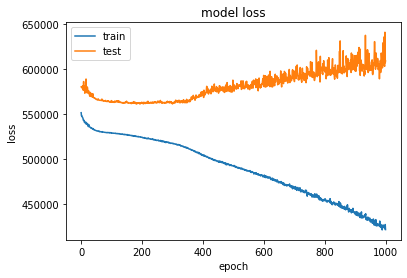

In [187]:
#from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [188]:
predictions = NN_model.predict(X_test)

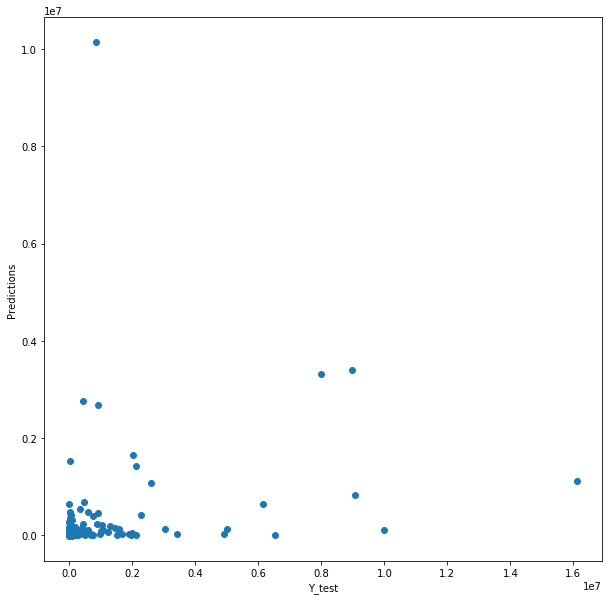

In [189]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.show()

#### Trying out Sequential Feature Selection

<Figure size 720x720 with 0 Axes>

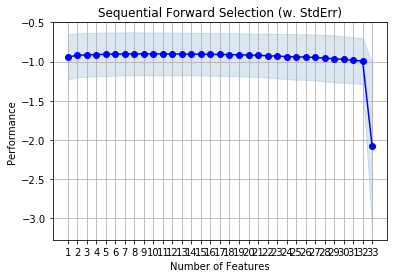

In [110]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=33, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)

plt.figure(figsize=(10,10))

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()